In [1]:
# Master Project: Risk Analysis & Predictive Modeling
# Phase 1 - Python
# Notebook 02: Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

RAW = Path("../00_Data/00_raw")
CLEAN = Path("../00_Data/01_clean")

In [3]:
# Loading the cleaned CSVs

customers = pd.read_csv(CLEAN / "customers_clean.csv")
financials = pd.read_csv(CLEAN / "financials_clean.csv")
claims = pd.read_csv(CLEAN / "claims_clean.csv")

print(customers.shape, financials.shape, claims.shape)


(20000, 7) (20000, 7) (20000, 7)


In [4]:
# I have merged customers + financials + claims into one master dataset

data = customers.merge(financials, on="customer_id", how="left") \
                .merge(claims, on="customer_id", how="left")

print(data.shape)
data.head()

(37384, 19)


customer_id             name   age   income employment_status   region  \
0        10000     Robert Ewing  69.0  40138.0          Employed    South   
1        10001     Kayla Adkins  32.0  42539.0     Self-Employed  Central   
2        10002     Manuel Clark  78.0  55388.0     Self-Employed  Central   
3        10002     Manuel Clark  78.0  55388.0     Self-Employed  Central   
4        10003  Heather Carlson  38.0  53068.0     Self-Employed     East   

           signup_date  loan_amount  credit_score  late_payments  \
0  2017-11-30 19:40:00          NaN           NaN            NaN   
1  2018-11-01 22:22:00       4316.0         460.0            0.0   
2  2019-02-28 11:56:00          NaN           NaN            NaN   
3  2019-02-28 11:56:00          NaN           NaN            NaN   
4  2021-03-23 03:31:00      20330.0         765.0            4.0   

   default_history  risk_score risk_level  claim_id        incident_date  \
0              NaN         NaN        NaN   53509.0  2023-04-10 04:58:54   
1              0.0        50.0        Low   50006.0  2020-05-04 07:26:35   
2              NaN         NaN        NaN   63555.0                  NaN   
3              NaN         NaN        NaN   68894.0                  NaN   
4              0.0        72.0     Medium       NaN                  NaN   

   claim_amount claim_status        claim_type neg_claim_flag  
0        7824.0     Approved             Other          False  
1        8649.0     Rejected             Other          False  
2        7765.0     Rejected  Natural Disaster          False  
3        8832.0     Rejected  Natural Disaster          False  
4           NaN          NaN               NaN            NaN

#### 3. Create New Features

In [5]:
# 3.1 Debt-to-Income Ratio (DTI)

data["debt_to_income_ratio"] = data["loan_amount"] / data["income"]

# Handle divide-by-zero / missing values
data["debt_to_income_ratio"] = data["debt_to_income_ratio"].replace([np.inf, -np.inf], np.nan).fillna(0)

In [6]:
#3.2 DTI Category

def dti_category(dti):
    if dti < 0.2:
        return "Low"
    elif dti < 0.5:
        return "Medium"
    else:
        return "High"

data["dti_category"] = data["debt_to_income_ratio"].apply(dti_category)
print(data["dti_category"].value_counts())

dti_category
Medium    18365
Low       15413
High       3606
Name: count, dtype: int64


In [7]:
#3.3 Risk Category (based on credit score / risk score)

def risk_category(score):
    if score < 580:
        return "High Risk"
    elif score < 670:
        return "Moderate Risk"
    elif score < 740:
        return "Low Risk"
    else:
        return "Very Low Risk"

data["credit_risk_category"] = data["credit_score"].apply(risk_category)
print(data["credit_risk_category"].value_counts())

credit_risk_category
Very Low Risk    15453
High Risk        14043
Moderate Risk     4447
Low Risk          3441
Name: count, dtype: int64


In [8]:
customers["signup_date"] = pd.to_datetime(customers["signup_date"])
data["customer_tenure_days"] = (pd.to_datetime("today") - customers["signup_date"]).dt.days

In [9]:
print(data.head())

   customer_id             name   age   income employment_status   region  \
0        10000     Robert Ewing  69.0  40138.0          Employed    South   
1        10001     Kayla Adkins  32.0  42539.0     Self-Employed  Central   
2        10002     Manuel Clark  78.0  55388.0     Self-Employed  Central   
3        10002     Manuel Clark  78.0  55388.0     Self-Employed  Central   
4        10003  Heather Carlson  38.0  53068.0     Self-Employed     East   

           signup_date  loan_amount  credit_score  late_payments  ...  \
0  2017-11-30 19:40:00          NaN           NaN            NaN  ...   
1  2018-11-01 22:22:00       4316.0         460.0            0.0  ...   
2  2019-02-28 11:56:00          NaN           NaN            NaN  ...   
3  2019-02-28 11:56:00          NaN           NaN            NaN  ...   
4  2021-03-23 03:31:00      20330.0         765.0            4.0  ...   

   claim_id        incident_date claim_amount  claim_status        claim_type  \
0   53509.0  2023

In [10]:
#4. Save Engineered Data

data.to_csv(CLEAN / "master_dataset.csv")

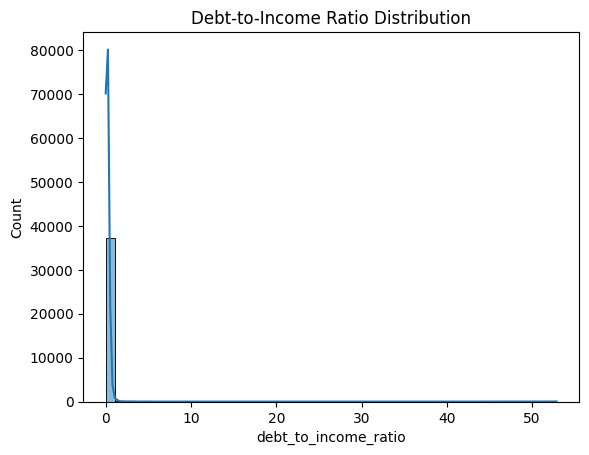

Mean DTI: 0.2519018482030901
Median DTI: 0.2408719533183597
Max DTI: 52.86785714285714
Min DTI: 0.0


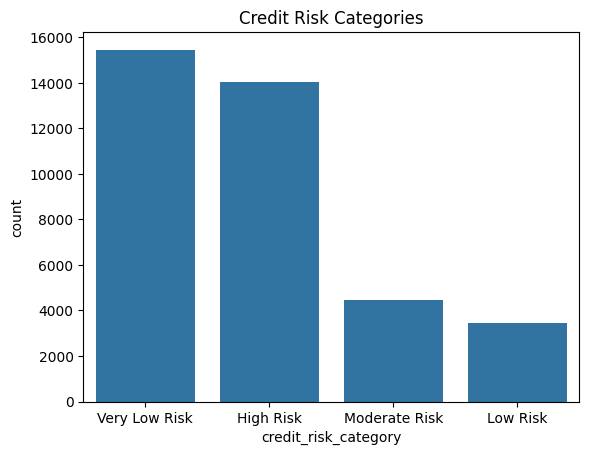

default_history            0.0       1.0
credit_risk_category                    
High Risk             0.902158  0.097842
Low Risk              0.906132  0.093868
Moderate Risk         0.903530  0.096470
Very Low Risk         0.889761  0.110239

In [11]:
# 5. Quick EDA on New Features

# Distribution of DTI
sns.histplot(data["debt_to_income_ratio"], bins=50, kde=True)
plt.title("Debt-to-Income Ratio Distribution")
plt.show()

print("Mean DTI:", data["debt_to_income_ratio"].mean())
print("Median DTI:", data["debt_to_income_ratio"].median())
print("Max DTI:", data["debt_to_income_ratio"].max())
print("Min DTI:", data["debt_to_income_ratio"].min())


# Risk Category Counts
sns.countplot(x="credit_risk_category", data=data)
plt.title("Credit Risk Categories")
plt.show()

# Cross-tab: Risk vs Default
pd.crosstab(data["credit_risk_category"], data["default_history"], normalize="index")


In [12]:
pip install pandas sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
from sqlalchemy import create_engine

# 1. Load your CSV

csv_path = r"C:\Users\HP\OneDrive\Fortray\Data Project\Master_Project\Project_V_Risk_Analysis\00_Data\01_clean\master_dataset.csv"
df = pd.read_csv(csv_path)

print("CSV Loaded:", df.shape)


# 2. Connected to MySQL

user = "root"
password = "viijetar606"
host = "localhost"
port = 3306
database = "risk_analysis"

# Created database engine
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}")


# 3. Uploaded to MySQL

# 'master_dataset' will be created automatically if it doesn't exist
df.to_sql(name="master_dataset", con=engine, if_exists="replace", index=False)

print("✅ CSV successfully uploaded to MySQL!")


CSV Loaded: (37384, 24)
✅ CSV successfully uploaded to MySQL!
